In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

In [4]:
#these are the update of (x,y) as per the question
def updates(params, x_old, y_old):
    x_new = (params[0]*x_old) + (params[1]*y_old) + (params[4])
    y_new = (params[2]*x_old) + (params[3]*y_old) + (params[5])
    
    return x_new,y_new

In [5]:
#initial conditions and conditions given in the question

#length of the simulation 
sim_length = 10000

#parameter value sets
A = [0.85,0.04,-0.04,0.85,0.00,1.60]
B = [0.20,-0.26,0.23,0.22,0.00,1.60]
C = [-0.15,0.28,0.26,0.24,0.00,0.44]
D = [0.00,0.00,0.00,0.16,0.00,0.00]

#keys and values for th dictionary 
values = [A,B,C,D]
keys = ['A', 'B', 'C','D']

#dictionary from the keys and vlues
table = dict(zip(keys, values))


#probability of selection of parameter set 'A', 'B', 'C' or 'D'
pa = 0.85
pb = 0.07
pc = 0.07
pd = 0.01
p = [pa,pb,pc,pd]

#initialsing the coordinate list
x = [None]*(sim_length)
y = [None]*(sim_length)
x[0] = 0
y[0] = 0

In [6]:
#verifying that the dictionary is what is expected
table

{'A': [0.85, 0.04, -0.04, 0.85, 0.0, 1.6],
 'B': [0.2, -0.26, 0.23, 0.22, 0.0, 1.6],
 'C': [-0.15, 0.28, 0.26, 0.24, 0.0, 0.44],
 'D': [0.0, 0.0, 0.0, 0.16, 0.0, 0.0]}

In [7]:
#main part of the program to calculate all the coordinates as the simulation steps proceed
for i in range(sim_length-1):
    params = table[np.random.choice(keys,1,replace=True,p=p)[0]]
    x[i+1], y[i+1] = updates(params, x[i], y[i])

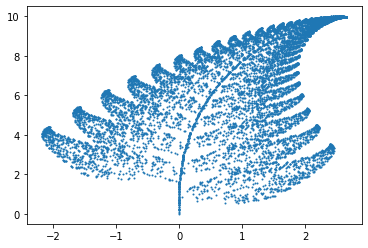

In [18]:
plt.plot(x,y,'.',markersize=2)

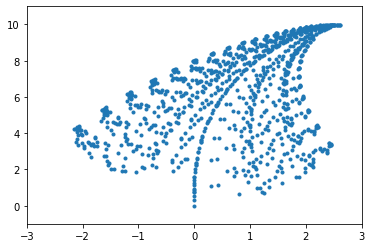

In [152]:
#creating a movie

fig = plt.figure()
ax = plt.axes(xlim=(-3, +3), ylim=(-1, 11))
line, = ax.plot([], [], '.')

def init():
    line.set_data([], [])
    return line,
def animate(i):
    line.set_data(x[:i], y[:i])
    return line,

Writer = animation.writers['pillow']
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)

anim = FuncAnimation(fig,animate,init_func=init,save_count=1000,blit=True)


anim.save('fractal.gif',writer=writer)

# Rough Work - Ignore

In [9]:
#checking if the probaiblity distribution of 'A', 'B', 'C' and 'D' matches that given in the question
countA = 0
countB = 0
countC = 0
countD = 0
for i in range(0,10000):
    r = np.random.choice(['A','B','C','D'],1,replace=True,p=p)[0]
    if r == 'A':
        countA = countA+1
    elif r == 'B':
        countB = countB+1
    elif r == 'C':
        countC = countC+1
    else:
        countD = countD+1

In [11]:
print(countA/10000,countB/10000,countC/10000,countD/10000)

0.851 0.0704 0.0693 0.0093
